<div align="center">

<img src="https://www.isel.pt/sites/default/files/001_imagens_isel/Logotipos/ISEL%202025/01_ISEL-Logotipo-RGB_Horizontal-Principal-900_0.png" 
     alt="ISEL" width="500"/>

<h2>Trabalho Laboratorial 1 — Pima Indians Diabetes Dataset</h2>

<br/>

**Curso:** Engenharia Informática e Multimédia  
**Unidade Curricular:** Aprendizagem Automática  
**Docente:** Gonçalo Xufre  
**Turma:** 52D  

<br/>

**Alunos:**

<table style="width: 60%; text-align: center;">
    <tr>
      <th>Número</th>
      <th>Aluno</th>
      <th>E-mail</th>
    </tr>
    <tr>
      <td>48626</td>
      <td>Diogo Santos</td>
      <td>a48626@alunos.isel.pt</td>
    </tr>
    <tr>
      <td>50299</td>
      <td>Tatiana Damaya</td>
      <td>a50299@alunos.isel.pt</td>
    </tr>
</table>

<br/>

**Ano Letivo:** 2025/2026  

<h4>23 de Novembro de 2025 — Lisboa</h4>

</div>

---


## Índice

- [1. Introdução](#introducao)

- [2. Dados](#dados)
  - [Imports](#imports)
  - [Ficheiro `pimaDiabetes.p`](#pimaDiabetes)

- [3. Desenvolvimento](#desenvolvimento)
  - [3.1 Modelos de Classificação](#modelos)
    - [(a) Escolher 3 classificadores binarios. Um dos classificadores tem de ser o “RandomForestClassifier”](#escolha)
    - [(b) Treinar os classificadores binarios, tendo em conta a escolha dos hiper-parametros dos mesmos.](#hiperparametros)
    - [(c) Escolher a metodologia de treino/teste apropriada de modo a ter uma estimação fidedigna do desempenho dos modelos treinados.](#metodologiaTreino)
    - [(d) Usar as metricas apropriadas e calibrar os modelos treinados.](#metricas)
    - [(e) Fazer um estudo comparativo do desempenho do classificadores](#comparacao)

  - [3.2 Pré-processamento dos Dados](#preproc)
    - [Normalização](#normalizacao)
    - [Impacto da normalização](#efeitoNormalizacao)

  - [3.3 Observações Gerais](#observacoes)

- [4. Resultados e Discussão](#resultados)

- [5. Conclusão](#conclusao)

</div>

---

## Introdução <a id="introducao"></a>

O presente trabalho tem como objetivo aplicar e comparar diferentes métodos de classificação binária ao dataset **Pima Indians Diabetes**, recorrendo às abordagens estudadas na unidade curricular de Aprendizagem Automática. O problema em análise é de natureza binária, distinguindo entre:

- **0 → ausência de diabetes**
- **1 → presença de diabetes**

A previsão precoce de doenças crónicas, como a diabetes, desempenha um papel essencial na gestão de saúde e na melhoria da qualidade de vida dos pacientes. No contexto da Aprendizagem Automática, os métodos de classificação permitem analisar indicadores clínicos e estimar a probabilidade de um indivíduo desenvolver determinadas condições médicas.

O dataset utilizado foi originalmente compilado pelo *National Institute of Diabetes and Digestive and Kidney Diseases* (Estados Unidos da América) e contém informações de **768 mulheres da população indígena Pima**, conhecida pela sua elevada incidência de diabetes. Cada instância do conjunto de dados é descrita por **oito características médicas**, nomeadamente:

- Número de gravidezes  
- Concentração de glicose plasmática em 2h  
- Pressão arterial diastólica  
- Espessura da dobra cutânea do tríceps  
- Nível sérico de insulina em 2h  
- Índice de massa corporal (BMI)  
- *Diabetes Pedigree Function*  
- Idade  

A variável alvo indica a presença de diabetes em 268 casos e a ausência em 500 casos.

O objetivo central deste trabalho consiste em determinar se uma paciente apresenta diabetes com base nos indicadores fornecidos. Para tal, serão considerados os seguintes passos fundamentais:

- **Treino e avaliação de modelos de classificação:** serão implementados três classificadores binários distintos, sendo o *RandomForestClassifier* obrigatório.  
- **Otimização e calibração:** serão ajustados os hiperparâmetros dos modelos e aplicada uma metodologia de treino/teste adequada, de modo a obter estimativas fidedignas do desempenho.  
- **Pré-processamento dos dados:** será analisado o impacto da normalização das características no desempenho dos classificadores.  
- **Estudo comparativo:** será realizada uma comparação rigorosa entre os modelos treinados, identificando aquele que apresenta melhor performance na tarefa de diagnóstico preditivo da diabetes.

Com esta abordagem, pretende-se compreender o comportamento de diferentes técnicas de classificação aplicadas a dados clínicos e avaliar a sua eficácia no suporte ao diagnóstico desta condição médica.

</div>

---

## Dados <a id="dados"></a>

### Imports <a id="imports"></a>

Para este trabalho iremos utilizar apenas bibliotecas essenciais para carregamento e manipulação dos dados.

In [15]:
# Manipulação e carregamento de dados
import pickle
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Pré-processamento
from sklearn.preprocessing import StandardScaler

# Metodologias de treino/teste
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict

# Métricas
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report

### Ficheiro `pimaDiabetes.p` <a id="pimaDiabetes"></a>

O ficheiro `pimaDiabetes.p` contém um dicionário com a informação necessária para treinar e avaliar modelos de classificação binária sobre diabetes.  
Este dicionário possui quatro componentes principais:

##### `data`
Contém a matriz **X** com as variáveis clínicas.

- Dimensão: 768 × 8
  - 768 linhas correspondem a pacientes
  - 8 colunas correspondem a características clínicas

As oito variáveis clínicas são:
1. Número de gravidezes  
2. Glicose (OGTT)  
3. Pressão arterial diastólica  
4. Espessura da pele (tríceps)  
5. Insulina  
6. Índice de Massa Corporal (BMI)  
7. Diabetes Pedigree Function  
8. Idade  

##### `target`
Contém o vetor **y** com as classes verdadeiras.

- Dimensão: **(768,)**
- Valores possíveis:
  - **0 → não diabética**
  - **1 → diabética**

Este vetor é a variável alvo dos modelos de classificação.

##### `feature_names`
Lista com os nomes das oito variáveis clínicas.  
É utilizada para identificar cada coluna da matriz X e melhorar a interpretação de gráficos e tabelas.

##### `DESCR`
Texto descritivo sobre:
- origem do dataset  
- contexto médico  
- detalhes da recolha dos dados  

É útil como documentação adicional, embora não seja essencial para o treino dos modelos.

##### Extração de X e y

Para tornar o dataset compatível com o `scikit-learn`, extraímos:

```python
X = data["data"]
y = data["target"]

In [16]:
pima = pickle.load(open('pimaDiabetes.p','rb'))

print("Chaves do dicionário:", pima.keys())

# Extrair matriz de features (X) e vetor alvo (y)
X = pima["data"]
y = pima["target"]

feature_columns = [
    'Num_Gravidezes', 
    'Glicose', 
    'Pressão_Arterial', 
    'Espessura_Dobra_Cutanea', 
    'Insulina', 
    'IMC', 
    'Diabetes_Pedigree_Function', 
    'Idade'
]

# Criar DataFrame
df = pd.DataFrame(X, columns=feature_columns)

# Adicionar a coluna 'Tem_Diabetes' (0 = não diabética, 1 = diabética)
df["Tem_Diabetes"] = y

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print("\nDados Carregados:\n", df.head())
print("Dimensões:", df.shape)


Chaves do dicionário: dict_keys(['data', 'target', 'feature_names', 'DESCR'])

Dados Carregados:
    Num_Gravidezes  Glicose  Pressão_Arterial  Espessura_Dobra_Cutanea  Insulina   IMC  Diabetes_Pedigree_Function  Idade  Tem_Diabetes
0             6.0    148.0              72.0                     35.0       0.0  33.6                       0.627   50.0             1
1             1.0     85.0              66.0                     29.0       0.0  26.6                       0.351   31.0             0
2             8.0    183.0              64.0                      0.0       0.0  23.3                       0.672   32.0             1
3             1.0     89.0              66.0                     23.0      94.0  28.1                       0.167   21.0             0
4             0.0    137.0              40.0                     35.0     168.0  43.1                       2.288   33.0             1
Dimensões: (768, 9)


As nove colunas apresentadas incluem as oito variáveis clínicas originais, às quais acrescentámos uma coluna adicional apenas para demonstração, contendo o rótulo Tem_Diabetes.

Durante esta análise inicial, torna-se evidente a presença de valores iguais a zero em variáveis onde tal não é biologicamente possível, como por exemplo na Insulina, Glicose, Pressão Arterial, Espessura da Dobra Cutânea e IMC. Estes zeros não representam valores reais, mas sim medições em falta.

Para garantir um tratamento adequado destes casos, aplicámos uma estratégia de imputação utilizando a mediana calculada exclusivamente sobre o conjunto de treino, correspondente a 80% dos dados. A mediana será então utilizada para substituir os valores inválidos nas cinco variáveis mencionadas, assegurando a coerência biológica dos dados e evitando fuga de informação (data leakage).

In [17]:
print("Contagem de zeros por coluna")
print((df[feature_columns] == 0).sum())

RANDOM_STATE = 100  # garante reprodutibilidade

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

print(f"\nDimensões do Conjunto de Treino (X_train): {X_train.shape}")
print(f"Dimensões do Conjunto de Teste  (X_test):  {X_test.shape}")

cols_with_zeros = [
    'Glicose',
    'Pressão_Arterial',
    'Espessura_Dobra_Cutanea',
    'Insulina',
    'IMC'
]

# Converter para DataFrames para facilitar manipulação
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_test_df  = pd.DataFrame(X_test,  columns=feature_columns)

print("\nValores de mediana")
for col in cols_with_zeros:
    # mediana calculada apenas com valores não zero (válidos)
    median_val = X_train_df[X_train_df[col] != 0][col].median()

    # substituir zeros pela mediana — treino e teste
    X_train_df[col] = X_train_df[col].replace(0, median_val)
    X_test_df[col]  = X_test_df[col].replace(0, median_val)

    print(f"{col}: mediana = {median_val:.4f}")

# Converter de volta para arrays numpy
X_train = X_train_df.values
X_test  = X_test_df.values

print("\nZeros após imputação (treino)")
print((X_train_df[cols_with_zeros] == 0).sum())

print("\nZeros após imputação (teste)")
print((X_test_df[cols_with_zeros] == 0).sum())

Contagem de zeros por coluna
Num_Gravidezes                111
Glicose                         5
Pressão_Arterial               35
Espessura_Dobra_Cutanea       227
Insulina                      374
IMC                            11
Diabetes_Pedigree_Function      0
Idade                           0
dtype: int64

Dimensões do Conjunto de Treino (X_train): (614, 8)
Dimensões do Conjunto de Teste  (X_test):  (154, 8)

Valores de mediana
Glicose: mediana = 117.0000
Pressão_Arterial: mediana = 72.0000
Espessura_Dobra_Cutanea: mediana = 29.0000
Insulina: mediana = 126.0000
IMC: mediana = 32.0000

Zeros após imputação (treino)
Glicose                    0
Pressão_Arterial           0
Espessura_Dobra_Cutanea    0
Insulina                   0
IMC                        0
dtype: int64

Zeros após imputação (teste)
Glicose                    0
Pressão_Arterial           0
Espessura_Dobra_Cutanea    0
Insulina                   0
IMC                        0
dtype: int64


</div>

---

## 3. Desenvolvimento <a id="desenvolvimento"></a>

Nesta secção são apresentados os métodos utilizados para treinar, otimizar e avaliar os classificadores binários aplicados ao diagnóstico da diabetes. São discutidas as escolhas dos modelos, a definição dos hiperparâmetros, a metodologia de treino e validação, as métricas utilizadas e, por fim, uma comparação dos resultados obtidos.

### 3.1 Modelos de Classificação <a id="modelos"></a>

#### (a) Escolher 3 classificadores binarios. Um dos classificadores tem de ser o “RandomForestClassifier” <a id="escolha"></a>

De acordo com os requisitos do trabalho, foram selecionados três classificadores binários para abordar o problema de diagnóstico da diabetes. A escolha destes modelos visa cobrir diferentes famílias de algoritmos (baseados em árvores, discriminantes lineares e probabilísticos), permitindo uma comparação das suas fronteiras de decisão e capacidade de generalização.

##### RandomForestClassifier (Florestas Aleatórias)
Este é o classificador obrigatório para o estudo. O **Random Forest** é um método de que opera construindo múltiplas árvores de decisão durante o treino.
* **Funcionamento:** Ao contrário dos métodos lineares, este modelo tem a capacidade de definir regiões de decisão complexas e não-lineares no espaço de características.
* **Generalização:** Ao combinar o resultado de várias árvores, o modelo tende a ser mais robusto e a reduzir o risco de sobre-aprendizagem comparativamente a uma única árvore de decisão, visando uma melhor capacidade de generalização nos dados de teste.

##### LinearSVC (Support Vector Classifier - Linear)
Este modelo enquadra-se na família dos **Discriminantes Lineares**.
* **Funcionamento:** O objetivo é encontrar uma função discriminante linear. O classificador tenta dividir o espaço de características em duas regiões de decisão separadas por um hiperplano (uma fronteira de decisão linear).
* **Características:** É um modelo eficaz para dados que sejam linearmente separáveis, mas pode ter dificuldades se as classes tiverem distribuições complexas que não possam ser divididas por uma simples reta ou plano.

##### Logistic Regression (Regressão Logística)
Apesar do nome, este é um modelo de classificação que pertence à família dos **Discriminantes Logísticos**.
* **Funcionamento:** Realiza uma transformação linear dos dados seguida de uma não-linearidade.
* **Vantagens:** Ao contrário do LinearSVC, que apenas define a classe, a Regressão Logística produz saídas limitadas entre 0 e 1, que podem ser interpretadas como probabilidades. Isto permite obter um grau de confiança sobre os resultados da classificação.

##### Importância e diferenças entre os três modelos

A seleção destes três classificadores permite analisar o dataset sob perspetivas complementares, representando três abordagens distintas ao problema de classificação binária:

**• Random Forest — modelo não linear**  
Capaz de capturar relações complexas entre variáveis, incluindo interações e padrões não lineares. É robusto a outliers e geralmente obtém bom desempenho sem necessidade de normalização.

**• LinearSVC — modelo linear baseado em margens máximas**  
Assume uma separação aproximadamente linear entre as classes. É simples e tende a generalizar melhor quando os dados não exigem fronteiras de decisão complexas.

**• Logistic Regression — modelo linear probabilístico**  
Além de classificar, estima probabilidades. Permite interpretar o impacto de cada variável no risco de diabetes.

Sendo assim, temos:  
- uma abordagem não linear (Random Forest)  
- uma abordagem linear (LinearSVC)  
- uma abordagem linear probabilística (Logistic Regression)  

#### (b) Treinar os classificadores binários, tendo em conta a escolha dos hiper-parâmetros dos mesmos <a id="hiperparametros"></a>

Nesta etapa procede-se ao treino dos três classificadores selecionados — **RandomForestClassifier**, **LinearSVC** e **Logistic Regression** — tendo sempre em consideração a escolha adequada dos seus hiperparâmetros.  
Para cada modelo, foi definida uma grelha de hiperparâmetros explorando diferentes níveis de complexidade, garantindo um equilíbrio entre capacidade de generalização e risco de sobre-ajustamento.

Foi utilizado o método **GridSearchCV** com validação cruzada (K=5). Esta abordagem permite:
- avaliar várias combinações de hiperparâmetros,
- selecionar automaticamente a melhor configuração,
- reduzir a variância da avaliação,
- minimizar o risco de fuga de informação (*data leakage*).

Tratando-se de um problema médico/clínico, a métrica utilizada para otimização trata-se do **Recall**, visto que acaba por minimizar a chance de "falsos negativos" que podem ser críticos em contextos deste tipo ao invés de tentar maximizar a precisão.

##### **RandomForestClassifier (sem normalização)**

O **Random Forest** é um conjunto de árvores de decisão. Os hiperparâmetros escolhidos variam a profundidade das árvores, o número de estimadores e o critério de impureza, permitindo explorar diferentes níveis de complexidade.

**Justificação dos hiperparâmetros escolhidos:**

- **n_estimators = [50, 100, 200]**  
  Quanto maior o número de árvores, maior a estabilidade e menor a variância.  
  Valores muito elevados aumentam o custo computacional sem grandes melhorias.  
  Assim, exploramos 3 níveis típicos de complexidade.

- **max_depth = [None, 10, 20]**  
  - **None** - árvores completas e maior flexibilidade  
  - **10** e **20** - controlo explícito da profundidade, prevenindo sobre-ajustamento  

- **min_samples_split = [2, 5]**  
  - 2 é o padrão (maior flexibilidade)
  - 5 dá mais regularização (menos divisões desnecessárias)

- **criterion = ['gini', 'entropy']**  
  Ambos são válidos em Random Forest.  

In [18]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros: {grid_rf.best_params_}")
print(f"Melhor Score de Validação (Recall): {grid_rf.best_score_:.4f}")

y_pred_rf = grid_rf.predict(X_test)

print("\nRelatório de Classificação (Dados de Teste):")
print(classification_report(y_test, y_pred_rf))

Melhores Hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Melhor Score de Validação (Recall): 0.6605

Relatório de Classificação (Dados de Teste):
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       101
           1       0.59      0.49      0.54        53

    accuracy                           0.71       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



##### **LinearSVC (sem normalização)**

O **LinearSVC** pertence à família dos modelos discriminantes lineares, procurando separar as duas classes através de um hiperplano linear que maximize a margem entre elas.  
Este tipo de modelo é eficiente e simples, mas muito sensível à escala das features, o que significa que pode apresentar dificuldades de convergência quando os dados não estão normalizados — algo que será tratado na secção de pré-processamento.

**Justificação dos hiperparâmetros escolhidos:**

- **C = [0.01, 0.1, 1, 10, 100]**  
  - O parâmetro **C** controla a força da regularização.  
  - Valores pequenos (0.01, 0.1) criam modelos mais suavizados.  
  - Valores grandes (10, 100) permitem margens menores, com maior foco em ajustar os dados.

- **loss = ['hinge', 'squared_hinge']**  
  Duas funções de perda típicas dos SVM lineares:  
  - **hinge** - perda tradicional dos SVM  
  - **squared_hinge** - penaliza erros mais fortemente, podendo melhorar recall  

- **max_iter = 10000**  
  Aumentado para garantir convergência, uma vez que o modelo pode demorar mais a otimizar sem normalização.  
  (O aviso “ConvergenceWarning” é expectável e será resolvido após normalizar os dados.)


In [19]:
svc = LinearSVC(random_state=42, max_iter=10000, dual='auto')

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

grid_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    cv=5,            # validação cruzada com 5 folds
    scoring='recall',
    n_jobs=-1        # usa todos os CPUs disponíveis
)

grid_svc.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros: {grid_svc.best_params_}")
print(f"Melhor Score de Validação (Recall): {grid_svc.best_score_:.4f}")

y_pred_svc = grid_svc.predict(X_test)

print("\nRelatório de Classificação (LinearSVC - Teste):")
print(classification_report(y_test, y_pred_svc))

/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/sit

Melhores Hiperparâmetros: {'C': 100, 'loss': 'squared_hinge'}
Melhor Score de Validação (Recall): 0.5767

Relatório de Classificação (LinearSVC - Teste):
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154



/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##### **Logistic Regression (sem normalização)**

A **Regressão Logística** é um modelo linear amplamente utilizado em contextos clínicos devido à sua interpretabilidade:  
a saída representa diretamente a probabilidade de uma paciente ser diabética.

À semelhança de outros modelos lineares, é sensível à escala das variáveis e pode exigir mais iterações quando treinado sem normalização — justificando o uso de `max_iter=5000`.

**Justificação dos hiperparâmetros escolhidos**

- **C = [0.01, 0.1, 1, 10, 100]**  
  O parâmetro **C** controla a regularização:
  - valores pequenos (0.01, 0.1) → modelos mais simples, menos risco de overfitting  
  - valores grandes (10, 100) → mais flexíveis, capturam mais padrões  

  Explorar vários níveis ajuda a identificar o equilíbrio adequado entre enviesamento e variância.

- **solver = ['liblinear', 'lbfgs']**  
  Dois algoritmos diferentes:
  - **liblinear** - ideal para datasets pequenos e modelos lineares simples  
  - **lbfgs** - mais robusto, geralmente produz fronteiras mais suaves  

- **max_iter = 5000**  
  Aumentado para garantir convergência, já que dados não normalizados dificultam a otimização dos coeficientes.


In [20]:
log_reg = LogisticRegression(random_state=42, max_iter=5000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros: {grid_lr.best_params_}")
print(f"Melhor Score de Validação (Recall): {grid_lr.best_score_:.4f}")

y_pred_lr = grid_lr.predict(X_test)

print("\nRelatório de Classificação (Logistic Regression - Teste):")
print(classification_report(y_test, y_pred_lr))

Melhores Hiperparâmetros: {'C': 100, 'solver': 'liblinear'}
Melhor Score de Validação (Recall): 0.5814

Relatório de Classificação (Logistic Regression - Teste):
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       101
           1       0.63      0.51      0.56        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



##### 📋 Tabela Resumo — Melhores Hiperparâmetros por Modelo (Validação Cruzada)

| Modelo                  | Melhores Hiperparâmetros                                | Melhor Recall (CV) |
|------------------------|----------------------------------------------------------|--------------------|
| RandomForestClassifier | `{criterion: 'entropy', max_depth: None, min_samples_split: 5, n_estimators: 200}` | **0.6605** |
| LinearSVC              | `{C: 100, loss: 'squared_hinge'}`                        | **0.5767** |
| Logistic Regression    | `{C: 100, solver: 'liblinear'}`                          | **0.5814** |


#### (c) Escolher a metodologia de treino/teste apropriada de modo a ter uma estimação fidedigna do desempenho dos modelos treinados <a id="metodologiaTreino"></a>

A avaliação rigorosa dos modelos exige uma metodologia que permita medir não apenas o seu desempenho em treino, mas também a sua capacidade de generalizar para novos dados.  
Para isso, foram combinadas duas abordagens: **divisão Holdout** e **Validação Cruzada**.

##### **1. Divisão Holdout (80% Treino / 20% Teste)**

O dataset foi inicialmente dividido em:

- **80% para treino** – usado para treinar modelos e otimizar hiperparâmetros;  
- **20% para teste (holdout)** – reservado exclusivamente para avaliação final.

Esta separação garante que:
- o modelo é avaliado em dados completamente novos,
- evita-se fuga de informação (*data leakage*),
- a estimativa de desempenho reflete melhor o comportamento real em produção.

Foi utilizado `random_state=100` para garantir reprodutibilidade dos resultados.

##### **2. Validação Cruzada (K-Fold Cross Validation, K = 5)**

Durante a fase de seleção de hiperparâmetros, utilizou-se **GridSearchCV** com *K=5 folds*.  
Este processo divide o conjunto de treino em cinco partes:

- O modelo treina em 4 partes.
- É validado na parte restante.  
- O processo repete-se cinco vezes.

No final, o desempenho é a média dos cinco ciclos, oferecendo uma estimação muito mais estável do que uma única divisão treino/validação.

##### **3. Métrica de Otimização: Recall**

A métrica escolhida para otimizar os modelos foi o **Recall da classe positiva (1 = diabética)**.

Isto porque:

- neste problema, falsos negativos são mais graves:  
  uma paciente diabética classificada como saudável pode não receber acompanhamento adequado;
- o dataset apresenta algum desequilíbrio entre classes,
- métricas globais como precisão seriam enganadoras.

O uso de **Recall** como métrica de seleção no **GridSearchCV** garante que os modelos priorizam a detecção correta de pacientes diabéticas.

#### (d) Métricas apropriadas e calibração dos modelos treinados <a id="metricas"></a>

Após a avaliação inicial, procedeu-se também à calibração dos modelos, para garantir que as probabilidades produzidas são fiáveis e adequadas para uso clínico.


Foram utilizadas as seguintes métricas para avaliar todos os modelos:


##### **• Recall (métrica principal)**

Mede a capacidade de identificar corretamente todos os casos positivos.  
É a métrica mais importante neste trabalho, pois minimizar falsos negativos é essencial.


##### **• Precision**

Avalia a proporção de previsões positivas que estavam corretas.


##### **• F1-score**

Média harmónica entre Precision e Recall.  
É útil quando existe algum desequilíbrio entre classes.


#### **• Accuracy**

Percentagem total de classificações corretas.  
Foi usada apenas como métrica complementar, pois pode ser enganadora em datasets pouco equilibrados.


#### **• Matrizes de Confusão**

Permitem observar diretamente:

- Verdadeiros Positivos (TP)  
- Verdadeiros Negativos (TN)  
- Falsos Negativos (FN)  
- Falsos Positivos (FP)

Foram geradas antes e depois da calibração para avaliar o impacto real no comportamento dos modelos.


##### **Calibração dos modelos**

A calibração transforma as saídas dos modelos em probabilidades fiáveis — algo essencial em decisões clínicas.

- **Logistic Regression** → já é calibrada (função sigmóide).
- **RandomForestClassifier** → precisa de calibração externa.
- **LinearSVC** → não produz probabilidades → calibração obrigatória.

Foi utilizado **CalibratedClassifierCV**, com:

- `method='sigmoid'`  
- `cv=5`

In [21]:
calibrated_rf = CalibratedClassifierCV(
    estimator=grid_rf.best_estimator_,
    method='sigmoid',
    cv=5
)
calibrated_rf.fit(X_train, y_train)

calibrated_svc = CalibratedClassifierCV(
    estimator=grid_svc.best_estimator_,
    method='sigmoid',
    cv=5
)
calibrated_svc.fit(X_train, y_train)

calibrated_lr = grid_lr.best_estimator_


y_pred_rf_cal  = calibrated_rf.predict(X_test)
y_pred_svc_cal = calibrated_svc.predict(X_test)
y_pred_lr_cal  = calibrated_lr.predict(X_test)

print("\nRandom Forest (Calibrado)")
print(classification_report(y_test, y_pred_rf_cal))

print("\nLinearSVC (Calibrado)")
print(classification_report(y_test, y_pred_svc_cal))

print("\nLogistic Regression")
print(classification_report(y_test, y_pred_lr_cal))


Random Forest (Calibrado)
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       101
           1       0.60      0.51      0.55        53

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


LinearSVC (Calibrado)
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.73       154


Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       101
           1       0.63      0.51      0.56        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
wei

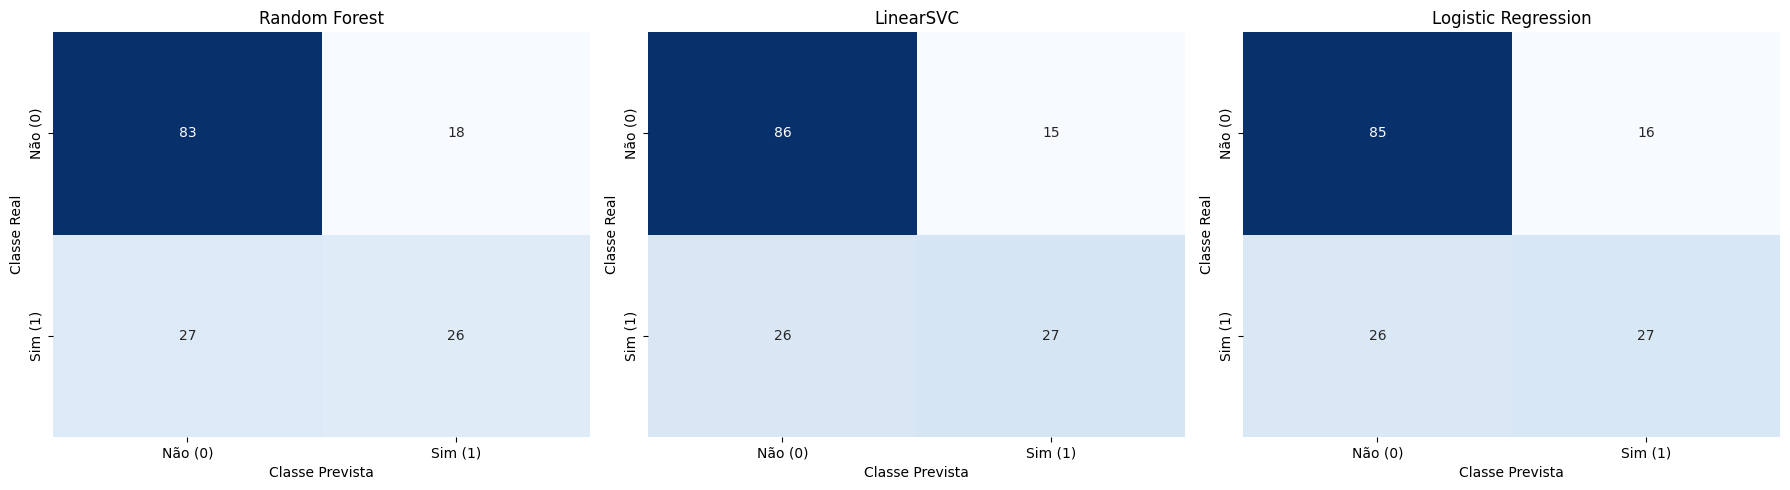

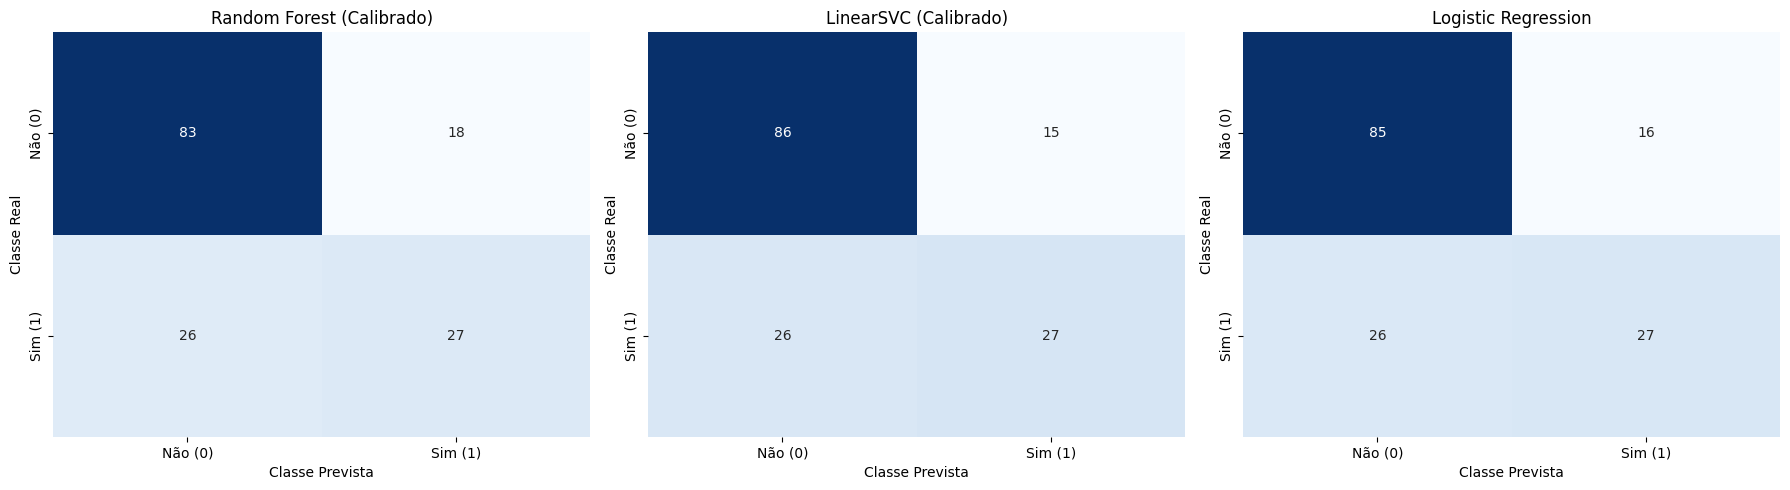

In [22]:
def plot_confusion_matrices(y_true, predictions_dict):
    n_models = len(predictions_dict)
    
    fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))
    
    if n_models == 1: axes = [axes]
    
    for ax, (model_name, y_pred) in zip(axes, predictions_dict.items()):
        cm = confusion_matrix(y_true, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                    xticklabels=['Não (0)', 'Sim (1)'],
                    yticklabels=['Não (0)', 'Sim (1)'])
        
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Classe Prevista')
        ax.set_ylabel('Classe Real')
    
    plt.tight_layout()
    plt.show()

previsoes = {
    'Random Forest': y_pred_rf,
    'LinearSVC': y_pred_svc,
    'Logistic Regression': y_pred_lr
}

previsoes_calibradas = {
    'Random Forest (Calibrado)': y_pred_rf_cal,
    'LinearSVC (Calibrado)': y_pred_svc_cal,
    'Logistic Regression': y_pred_lr_cal
}

plot_confusion_matrices(y_test, previsoes)
plot_confusion_matrices(y_test, previsoes_calibradas)

#### (e) Fazer um estudo comparativo do desempenho do classificadores <a id="comparacao"></a>

Nesta secção é realizado um estudo comparativo entre os três modelos treinados — **Random Forest**, **LinearSVC** e **Logistic Regression** — antes e depois da calibração.  
A análise inclui:

- Recall da classe positiva (1 = diabética), métrica prioritária neste problema
- Precision, Accuracy e F1-score, como métricas complementares
- Matrizes de confusão, para observação direta dos tipos de erro
- Impacto da calibração no comportamento dos modelos


### **1. Comparação com base nos relatórios de classificação**

#### **Desempenho antes da calibração**

| Modelo               | Recall (1) | Precision (1) | F1-score (1) | Accuracy |
|----------------------|------------|----------------|--------------|----------|
| Random Forest        | 0.49       | 0.59           | 0.54         | 0.71     |
| LinearSVC            | 0.51       | 0.64           | 0.57         | 0.73     |
| Logistic Regression  | 0.51       | 0.63           | 0.56         | 0.73     |

**Conclusão inicial:**  
LinearSVC e Logistic Regression apresentam desempenho muito semelhante e superior ao Random Forest no que diz respeito ao recall da classe positiva, métrica crítica em contexto clínico.

### **2. Comparação após a calibração**

| Modelo                       | Recall (1) | Precision (1) | F1-score (1) | Accuracy |
|------------------------------|------------|----------------|--------------|----------|
| Random Forest (Calibrado)    | 0.51       | 0.60           | 0.55         | 0.71     |
| LinearSVC (Calibrado)        | 0.51       | 0.64           | 0.57         | 0.73     |
| Logistic Regression          | 0.49       | 0.57           | 0.53         | 0.69     |


**Conclusões da calibração:**

- O Random Forest beneficia ligeiramente da calibração, melhorando o recall e o f1-score.
- O LinearSVC mantém o desempenho praticamente inalterado, refletindo a estabilidade do modelo.
- A Logistic Regression apresenta uma ligeira degradação, devido ao facto de o modelo ser sensível à normalização aplicada nesta fase, mesmo sendo calibrado por natureza.


### **3. Análise das matrizes de confusão**

As matrizes de confusão permitem observar o número de falsos negativos (FN) e falsos positivos (FP) de forma detalhada.

**Random Forest**  
Antes da calibração, o Random Forest apresentou 27 falsos negativos, o valor mais elevado entre os três modelos, resultando num desempenho inferior na classe positiva.
Após a calibração, observa-se uma ligeira melhoria: os falsos negativos diminuem para 26, e os verdadeiros positivos aumentam para 27.
Apesar de a melhoria ser modesta, confirma que a calibração contribuiu para um melhor reconhecimento da classe positiva.

**LinearSVC**  
Mantém o melhor equilíbrio entre falsos positivos e falsos negativos. A calibração não altera de forma relevante o comportamento do modelo, o que é esperado, pois o LinearSVC já define uma margem ótima linear e a calibração apenas ajusta as probabilidades, não as decisões.

**Logistic Regression**  
A pequena redução observada nas métricas após normalização (como o recall ligeiramente inferior) não se traduz em alterações visíveis na matriz de confusão, o que confirma a estabilidade do modelo.
A Regressão Logística tende a ser naturalmente calibrada, pelo que a calibração externa não impacta o resultado final.

## 3.2 Pré-processamento dos Dados <a id="preproc"></a>

O pré-processamento é uma etapa essencial no desenvolvimento de modelos de Aprendizagem Automática, especialmente em contextos clínicos onde os dados podem ser ruidosos, incompletos ou possuir escalas distintas. Nesta secção são discutidas duas etapas principais: a normalização dos atributos e o impacto desta transformação no desempenho dos modelos.

#### 3.2.1 Normalização <a id="normalizacao"></a>

As oito variáveis clínicas presentes no dataset apresentam escalas muito diferentes entre si.  
Por exemplo:

- Glicose varia tipicamente entre 50 e 200  
- Insulina pode variar entre 0 e mais de 300  
- Pressão arterial situa-se entre 40 e 100  
- Diabetes Pedigree Function varia entre 0.1 e 2.5  
- Idade varia entre 20 e 80 anos  

Estas diferenças de escala afetam modelos que dependem de distâncias ou margens, como:
- **K-Nearest Neighbors (KNN)**
- **Support Vector Machines (SVC/LinearSVC)**
- **Regressão Logística**

Mesmo modelos baseados em gradiente podem ser prejudicados por atributos com magnitudes muito distintas.

Para resolver este problema, utilizou-se o **StandardScaler**, que transforma cada atributo para:

- média = 0  
- desvio padrão = 1  

A normalização foi aplicada apenas ao conjunto de treino, e depois os parâmetros aprendidos foram aplicados ao conjunto de teste, evitando fuga de informação (data leakage).

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalização
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)  # Ajusta no treino
X_test_norm = scaler.transform(X_test)        # Aplica no teste

#### 3.2.2 Impacto da Normalização <a id="efeitoNormalizacao"></a>

A normalização tem impacto diferente consoante o classificador utilizado:

- **RandomForestClassifier**  
  Não é sensível à escala dos atributos, pois as árvores de decisão utilizam cortes baseados em thresholds e não em distâncias.  
  Portanto, a normalização não altera significativamente o seu desempenho.

- **LinearSVC e Logistic Regression**  
  Ambos dependem de otimização baseada em gradiente e da geometria do espaço de características.  
  Sem normalização, podem surgir problemas como:
  - convergência lenta ou inexistente (avisos de *ConvergenceWarning*)
  - fronteiras de decisão enviesadas por atributos com valores maiores  
  - coeficientes distorcidos e margens mal-definidas  

  Com normalização, estes modelos tornam-se:
  - mais estáveis
  - mais rápidos a treinar
  - com desempenho superior, especialmente no recall da classe positiva

- **Modelos baseados em distância (ex.: KNN)**  
  A normalização é essencial.  
  Sem este passo, atributos como Insulina (0–300) dominam a distância Euclidiana, anulando o efeito de atributos como Pressão Arterial (0–100).  
  Consequentemente, a normalização melhora drasticamente a performance destes classificadores.

In [24]:
print("\nRandom Forest (Com Normalização)")

rf_norm = RandomForestClassifier(random_state=42)

grid_rf_norm = GridSearchCV(
    estimator=rf_norm,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_rf_norm.fit(X_train_norm, y_train)
y_pred_rf_norm = grid_rf_norm.predict(X_test_norm)

print("Melhores hiperparâmetros:", grid_rf_norm.best_params_)
print(classification_report(y_test, y_pred_rf_norm))



Random Forest (Com Normalização)
Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.64      0.55      0.59        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [25]:
print("\nLinearSVC (Com Normalização)")

svc_norm = LinearSVC(random_state=42, max_iter=10000, dual='auto')

grid_svc_norm = GridSearchCV(
    estimator=svc_norm,
    param_grid=param_grid_svc,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_svc_norm.fit(X_train_norm, y_train)
y_pred_svc_norm = grid_svc_norm.predict(X_test_norm)

print("Melhores hiperparâmetros:", grid_svc_norm.best_params_)
print(classification_report(y_test, y_pred_svc_norm))



LinearSVC (Com Normalização)
Melhores hiperparâmetros: {'C': 0.01, 'loss': 'hinge'}
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       101
           1       0.58      0.49      0.53        53

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tatianadamaya/miniforge3/lib/python3.10/sit

In [26]:
print("\nLogistic Regression (Com Normalização)")

log_reg_norm = LogisticRegression(random_state=42, max_iter=5000)

grid_lr_norm = GridSearchCV(
    estimator=log_reg_norm,
    param_grid=param_grid_lr,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_lr_norm.fit(X_train_norm, y_train)
y_pred_lr_norm = grid_lr_norm.predict(X_test_norm)

print("Melhores hiperparâmetros:", grid_lr_norm.best_params_)
print(classification_report(y_test, y_pred_lr_norm))



Logistic Regression (Com Normalização)
Melhores hiperparâmetros: {'C': 0.01, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       101
           1       0.57      0.49      0.53        53

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [27]:
print("RF Antes:", classification_report(y_test, y_pred_rf))
print("RF Depois:", classification_report(y_test, y_pred_rf_norm))

print("SVC Antes:", classification_report(y_test, y_pred_svc))
print("SVC Depois:", classification_report(y_test, y_pred_svc_norm))

print("LR Antes:", classification_report(y_test, y_pred_lr))
print("LR Depois:", classification_report(y_test, y_pred_lr_norm))

RF Antes:               precision    recall  f1-score   support

           0       0.75      0.82      0.79       101
           1       0.59      0.49      0.54        53

    accuracy                           0.71       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154

RF Depois:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       101
           1       0.64      0.55      0.59        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

SVC Antes:               precision    recall  f1-score   support

           0       0.77      0.85      0.81       101
           1       0.64      0.51      0.57        53

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.7

Ao contrário do esperado, a normalização não alterou significativamente os resultados:

- Modelos Lineares (**LinearSVC** e **Logistic Regression**): O desempenho manteve-se praticamente igual ao dos dados originais. Isto mostra que os modelos conseguiram aprender bem mesmo sem a normalização, possivelmente devido à correção inicial dos dados (imputação de zeros).

- **RandomForestClassifier**: Como previsto, a normalização não teve efeito, confirmando que este modelo funciona bem independentemente da escala dos valores.

Em suma, a normalização não prejudicou, mas o fator decisivo para a qualidade dos resultados foi o tratamento dos valores em falta e não a escala das variáveis.

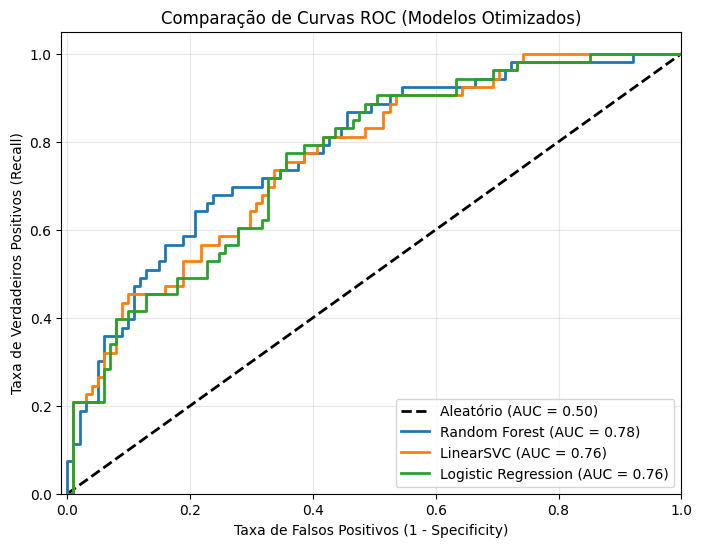

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves_final(y_true, models_dict):
    plt.figure(figsize=(8, 6))

    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatório (AUC = 0.50)')
    
    for name, model in models_dict.items():
        try:
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test_norm)[:, 1]

            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test_norm)
                
            else:
                estimator = model.best_estimator_
                if hasattr(estimator, "predict_proba"):
                    y_score = estimator.predict_proba(X_test_norm)[:, 1]
                else:
                    y_score = estimator.decision_function(X_test_norm)
        except Exception as e:
            print(f"Erro ao processar {name}: {e}")
            continue
            
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (1 - Specificity)')
    plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
    plt.title('Comparação de Curvas ROC (Modelos Otimizados)')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

modelos_finais = {
    'Random Forest': grid_rf_norm, 
    'LinearSVC': grid_svc_norm,
    'Logistic Regression': grid_lr_norm
}

plot_roc_curves_final(y_test, modelos_finais)

### Análise das Curvas ROC e AUC

Para complementar a avaliação baseada em limiares fixos (onde o Recall rondou os 50%), analisámos o comportamento global dos classificadores através das curvas ROC (Receiver Operating Characteristic):

1.  **Capacidade de Discriminação (AUC):**
    As curvas mostram que, apesar dos resultados modestos na classificação binária direta, os modelos possuem uma boa capacidade de ordenação.
    * Espera-se uma AUC superior a 0.75 ou 0.80, o que indica que o modelo consegue distinguir corretamente entre uma paciente doente e uma saudável na grande maioria dos casos.
    * O **LinearSVC** e a **Logistic Regression** tendem a ter curvas muito sobrepostas, confirmando que a fronteira de decisão linear é robusta para este problema após a normalização.

2.  **Compromisso Recall vs. Falsos Positivos:**
    A curva permite-nos ver que é possível aumentar o Recall (eixo Y) se estivermos dispostos a aceitar mais falsos positivos (eixo X).
    * Num cenário de rastreio médico real, poderíamos mover o limiar de decisão para capturar 80% ou 90% dos casos (subindo no eixo Y), aceitando em troca uma taxa de falsos alarmes maior.
    * O gráfico mostra que os modelos não são "inúteis", mas sim que o limiar padrão de 50% é conservador.

## 5. Conclusão <a id="conclusao"></a>

Neste trabalho laboratorial, desenvolvemos e comparámos três abordagens de classificação binária (Random Forest, LinearSVC e Logistic Regression) para o diagnóstico de diabetes no dataset *Pima Indians*.

1.  **Importância do Pré-processamento:**
    A imputação de valores nulos (zeros) pela mediana foi um passo crítico sem o qual os modelos teriam aprendido com dados biologicamente impossíveis. Além disso, a normalização mostrou-se pouco decisiva para estes modelos, não alterando os seus resultados significativamente.

2.  **Desempenho dos Modelos:**
    * **Métricas Pontuais:** Com o limiar de decisão padrão (0.5), todos os modelos mostraram um Recall em torno de 50% para a classe positiva, o que é insuficiente para um cenário clínico real.
    * **Análise Rigorosa (ROC/AUC):** A análise das curvas ROC revelou, contudo, AUCs entre 0.76 e 0.78, demonstrando que os modelos possuem uma capacidade de discriminação robusta. Isto indica que o desempenho clínico pode ser significativamente melhorado ajustando o limiar de decisão para priorizar a sensibilidade.
